In [2]:
import matplotlib.pyplot as plt
import shutil
import os
import warnings
import random
warnings.filterwarnings('ignore')
import tensorflow as tf

D0720 03:40:48.418521055      15 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D0720 03:40:48.418544096      15 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D0720 03:40:48.418547608      15 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D0720 03:40:48.418550467      15 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D0720 03:40:48.418553179      15 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D0720 03:40:48.418555994      15 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D0720 03:40:48.418559137      15 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D0720 03:40:48.

In [3]:
# !pip install seaborn

In [4]:
tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()

# instantiate a distribution strategy
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local
INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


In [5]:
# !pip install seaborn

In [6]:
original = "/kaggle/input/augmented-alzheimer-mri-dataset"
target = "/kaggle/working/"
for i in os.listdir(original):
    shutil.copytree(os.path.join(original,i),os.path.join(target,i))
    

In [7]:
aad = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/AugmentedAlzheimerDataset",
    image_size=(128, 128),
    batch_size = 64
)
od = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/OriginalDataset",
    image_size=(128, 128),
    batch_size = 64
)

Found 33984 files belonging to 4 classes.
Found 6400 files belonging to 4 classes.


In [8]:
class_name = aad.class_names
print(class_name)
aad

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

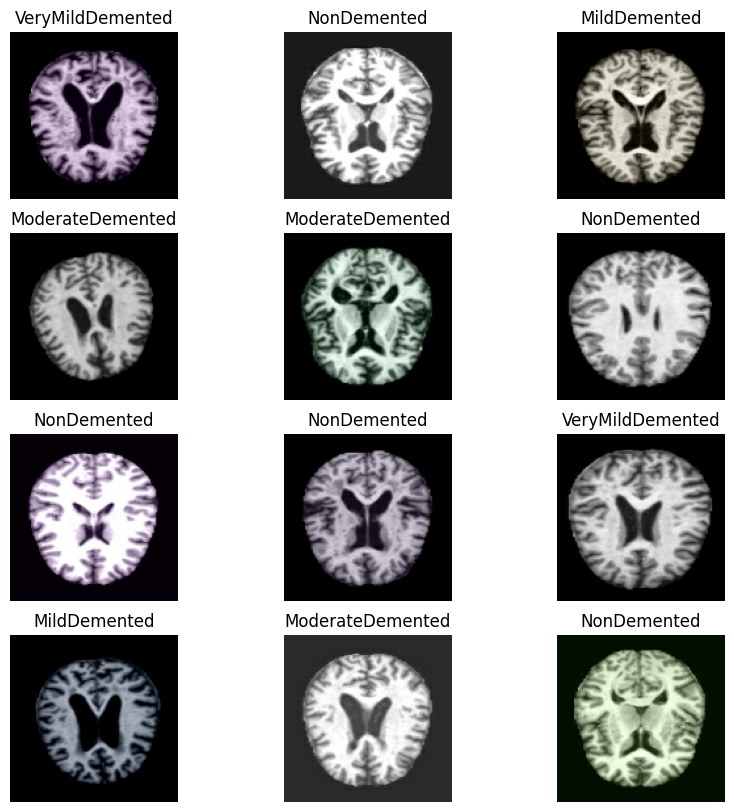

In [9]:
plt.figure(figsize=(10,10))
for images,labels in aad.take(1):
    for i in range(12):
        ax = plt.subplot(4,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_name[labels[i]])
        plt.axis("off")

In [10]:
root = "/kaggle/working/AugmentedAlzheimerDataset"
l = {}
for file in os.listdir(root):
    size = 0
    for i in os.listdir(os.path.join(root,file)):
        size+=1
    l[file] = size
print(l)

{'VeryMildDemented': 8960, 'NonDemented': 9600, 'MildDemented': 8960, 'ModerateDemented': 6464}


As we can see the number of pictures in the files are not the same.

This can lead to a model that is baised towards a specific category of images.

So, to avoid this, I am randoming copying the images in the same directory to make the number of images in a particular category equal to other.

In [11]:
for i,j,k in os.walk(root):
    for subfile in j:
        dirc = os.path.join(i,subfile)
        for m in range(max(l.values())-l[subfile]):
            rand = random.choice(os.listdir(dirc))
            shutil.copyfile(os.path.join(dirc,rand),os.path.join(dirc,"copy"+rand))

In [12]:
# shutil.rmtree("/kaggle/working/OriginalDataset")
# shutil.rmtree("/kaggle/working/AugmentedAlzheimerDataset")

In [13]:
with tpu_strategy.scope():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Rescaling(1./255, input_shape=(128,128, 3)))
    model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))


    model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    model.add(tf.keras.layers.Dropout(0.20))

    model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    # model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
    # model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Flatten())
    # model.add(tf.keras.layers.Dense(256,activation="relu",kernel_initializer="he_normal"))
    model.add(tf.keras.layers.Dense(128,"relu"))
    model.add(tf.keras.layers.Dense(64,"relu"))
    model.add(tf.keras.layers.Dense(4,"softmax"))

In [14]:
model.compile(loss="sparse_categorical_crossentropy",optimizer = "Adam",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0

In [15]:
history = model.fit(aad,epochs=100, batch_size=64, verbose=1)

Epoch 1/100


2023-07-20 03:44:40.497135: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-07-20 03:44:40.699998: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


531/531 [==============================] - 15s 17ms/step - loss: 0.9828 - accuracy: 0.5506
Epoch 2/100
531/531 [==============================] - 9s 17ms/step - loss: 0.6116 - accuracy: 0.7353
Epoch 3/100
531/531 [==============================] - 9s 16ms/step - loss: 0.4523 - accuracy: 0.8120
Epoch 4/100
531/531 [==============================] - 9s 16ms/step - loss: 0.3413 - accuracy: 0.8653
Epoch 5/100
531/531 [==============================] - 9s 16ms/step - loss: 0.2721 - accuracy: 0.8916
Epoch 6/100
531/531 [==============================] - 9s 16ms/step - loss: 0.2198 - accuracy: 0.9136
Epoch 7/100
531/531 [==============================] - 9s 17ms/step - loss: 0.1857 - accuracy: 0.9281
Epoch 8/100
531/531 [==============================] - 9s 16ms/step - loss: 0.1535 - accuracy: 0.9402
Epoch 9/100
531/531 [==============================] - 9s 16ms/step - loss: 0.1386 - accuracy: 0.9466
Epoch 10/100
531/531 [==============================] - 9s 16ms/step - loss: 0.1169 - accurac

In [16]:
get_ac = history.history['accuracy']
get_los = history.history['loss']

<Figure size 640x480 with 0 Axes>

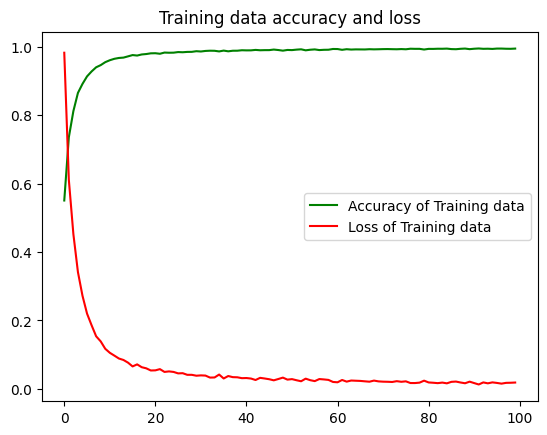

<Figure size 640x480 with 0 Axes>

In [17]:
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()


In [18]:
loss, accuracy = model.evaluate(od)

2023-07-20 04:00:19.212017: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-07-20 04:00:19.341223: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


100/100 [==============================] - 5s 14ms/step - loss: 0.0061 - accuracy: 0.9981


In [19]:
model.save("model2.h5")

In [20]:
with tpu_strategy.scope():
    model1 = tf.keras.Sequential()
    model1.add(tf.keras.layers.Rescaling(1./255, input_shape=(128,128, 3)))
    model1.add(tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
    model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))


    model1.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
    model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    model1.add(tf.keras.layers.Dropout(0.20))

    model1.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
    model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    model1.add(tf.keras.layers.Dropout(0.25))

    model1.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
    model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    model1.add(tf.keras.layers.Flatten())
    # model.add(tf.keras.layers.Dense(256,activation="relu",kernel_initializer="he_normal"))
    model1.add(tf.keras.layers.Dense(128,"relu"))
    model1.add(tf.keras.layers.Dense(64,"relu"))
    model1.add(tf.keras.layers.Dense(4,"softmax"))
    model1.compile(loss="sparse_categorical_crossentropy",optimizer = "Adam",metrics=["accuracy"])

In [21]:
# model1.compile(loss="sparse_categorical_crossentropy",optimizer = "Adam",metrics=["accuracy"])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 512)     14336     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 512)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 256)       1179904   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 256)      0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 256)      

In [22]:
history1 = model1.fit(aad,epochs=100, batch_size=64, verbose=1)

Epoch 1/100


2023-07-20 04:00:28.335557: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-07-20 04:00:28.509505: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


531/531 [==============================] - 25s 29ms/step - loss: 1.0372 - accuracy: 0.5285
Epoch 2/100
531/531 [==============================] - 15s 29ms/step - loss: 0.6358 - accuracy: 0.7136
Epoch 3/100
531/531 [==============================] - 15s 29ms/step - loss: 0.4607 - accuracy: 0.8020
Epoch 4/100
531/531 [==============================] - 15s 28ms/step - loss: 0.3361 - accuracy: 0.8639
Epoch 5/100
531/531 [==============================] - 15s 29ms/step - loss: 0.2545 - accuracy: 0.8998
Epoch 6/100
531/531 [==============================] - 15s 29ms/step - loss: 0.1966 - accuracy: 0.9246
Epoch 7/100
531/531 [==============================] - 15s 29ms/step - loss: 0.1553 - accuracy: 0.9396
Epoch 8/100
531/531 [==============================] - 15s 28ms/step - loss: 0.1299 - accuracy: 0.9514
Epoch 9/100
531/531 [==============================] - 15s 28ms/step - loss: 0.1138 - accuracy: 0.9581
Epoch 10/100
531/531 [==============================] - 15s 29ms/step - loss: 0.0989 

In [23]:
get_ac = history1.history['accuracy']
get_los = history1.history['loss']

<Figure size 640x480 with 0 Axes>

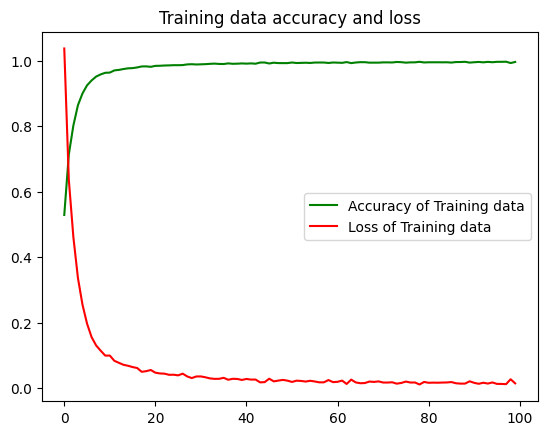

<Figure size 640x480 with 0 Axes>

In [24]:
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

In [25]:
loss, accuracy = model1.evaluate(od)

2023-07-20 04:26:52.096460: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-07-20 04:26:52.240646: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


100/100 [==============================] - 7s 20ms/step - loss: 0.0022 - accuracy: 0.9997


In [26]:
model1.save("Trained_Model.h5")

In [27]:
with tpu_strategy.scope():
    model2 = tf.keras.Sequential()
    model2.add(tf.keras.layers.Rescaling(1./255, input_shape=(128,128, 3)))
    model2.add(tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
    model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))


    model2.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
    model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    model2.add(tf.keras.layers.Dropout(0.20))

    model2.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
    model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    model2.add(tf.keras.layers.Dropout(0.25))

    model2.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
    model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    model2.add(tf.keras.layers.Flatten())
    # model.add(tf.keras.layers.Dense(256,activation="relu",kernel_initializer="he_normal"))
    model2.add(tf.keras.layers.Dense(128,"relu"))
    model2.add(tf.keras.layers.Dense(64,"relu"))
    model2.add(tf.keras.layers.Dense(4,"softmax"))
    model2.compile(loss="sparse_categorical_crossentropy",optimizer = "Adam",metrics=["accuracy"])

In [28]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 512)     14336     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 512)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 256)       1179904   
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 256)      0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 256)      

In [29]:
history2 = model2.fit(aad,epochs=100, batch_size=64, verbose=1, validation_data = od)

Epoch 1/100


2023-07-20 04:27:01.833752: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-07-20 04:27:01.992778: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


531/531 [==============================] - ETA: 0s - loss: 1.0127 - accuracy: 0.5411

2023-07-20 04:27:25.091559: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-07-20 04:27:25.229651: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


531/531 [==============================] - 31s 42ms/step - loss: 1.0127 - accuracy: 0.5411 - val_loss: 0.7502 - val_accuracy: 0.6330
Epoch 2/100
531/531 [==============================] - 19s 35ms/step - loss: 0.6429 - accuracy: 0.7102 - val_loss: 0.6296 - val_accuracy: 0.7292
Epoch 3/100
531/531 [==============================] - 18s 34ms/step - loss: 0.4532 - accuracy: 0.8077 - val_loss: 0.3305 - val_accuracy: 0.8637
Epoch 4/100
531/531 [==============================] - 18s 34ms/step - loss: 0.3202 - accuracy: 0.8680 - val_loss: 0.2604 - val_accuracy: 0.8980
Epoch 5/100
531/531 [==============================] - 18s 34ms/step - loss: 0.2369 - accuracy: 0.9069 - val_loss: 0.1178 - val_accuracy: 0.9544
Epoch 6/100
531/531 [==============================] - 18s 34ms/step - loss: 0.1811 - accuracy: 0.9322 - val_loss: 0.1035 - val_accuracy: 0.9613
Epoch 7/100
531/531 [==============================] - 18s 34ms/step - loss: 0.1454 - accuracy: 0.9460 - val_loss: 0.0497 - val_accuracy: 0.98

In [35]:
get_ac = history2.history['accuracy']
get_los = history2.history['loss']
val_acc = history2.history['val_accuracy']
val_loss = history2.history['val_loss']

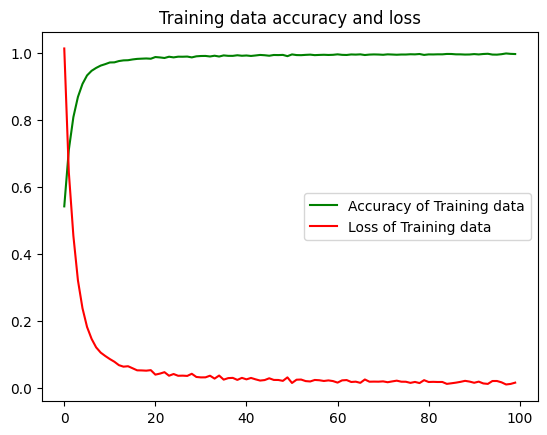

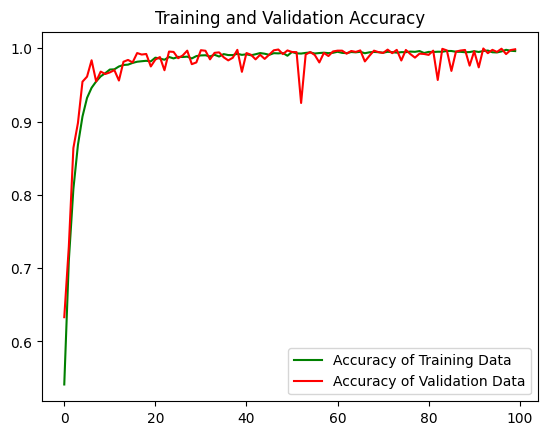

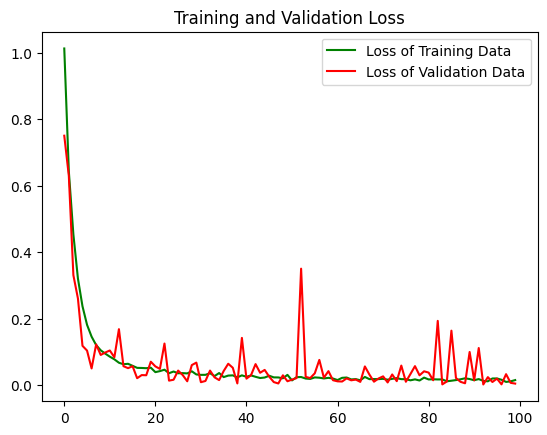

<Figure size 640x480 with 0 Axes>

In [36]:
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [37]:
loss, accuracy = model2.evaluate(od)

100/100 [==============================] - 3s 20ms/step - loss: 0.0042 - accuracy: 0.9986


In [38]:
model2.save("Trained_Model2.h5")